# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few type of classification problem:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now ... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


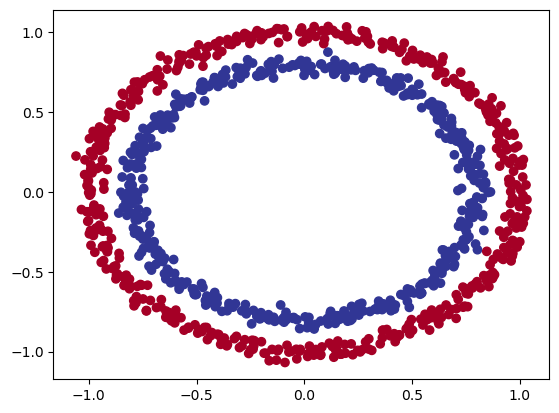

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# Vew the first example of feature and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate....

In [9]:
import tensorflow as tf

# set random seed
tf.random.set_seed(42)

# create the model using sequential api
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) 

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5


2023-07-03 11:21:10.974279: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 8ms/step - loss: 5.1429 - accuracy: 0.4780
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 4.7099 - accuracy: 0.4650
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 4.4615 - accuracy: 0.4710
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 3.1354 - accuracy: 0.4810
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7629 - accuracy: 0.4990


In [10]:
# Let's try and improbe our model by training for longer
model_1.fit(X, y, epochs=200,verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classificatoin problem and our model is getting around ~50% accuracy it's performing as it it's guessing. 

So let's setp hings up a notch and add an extra layer.

In [11]:
# set random seed
tf.random.set_seed(42)

# Create the model using Sequential api
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [12]:
# evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4310


[0.693345844745636, 0.4309999942779541]

In [13]:
# improbing our model

# set random seed
tf.random.set_seed(42)

# create a model using Sequential api
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the modle
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"]
               )

# fit the model
history = model_3.fit(X, y, epochs=100, verbose=0)

In [14]:
# evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.6985 - accuracy: 0.5030


[0.6985294818878174, 0.503000020980835]

<Axes: >

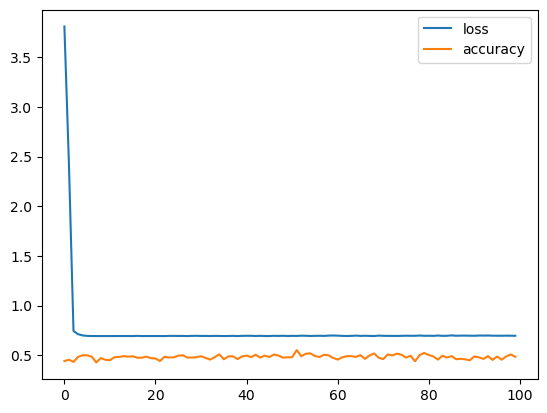

In [15]:
pd.DataFrame(history.history).plot()

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

    * Take in a trained model, features (X) and labels (y)
    * Create a meshgrid of the different X values 
    * Make predictions across the meshgrid
    * Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # create x value (we're gonig to make predictions on these)
    X_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(X_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("dong multiclass classification")
        # we have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
        
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [17]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

313/313 [==============================] - 1s 1ms/step
doing binary classification


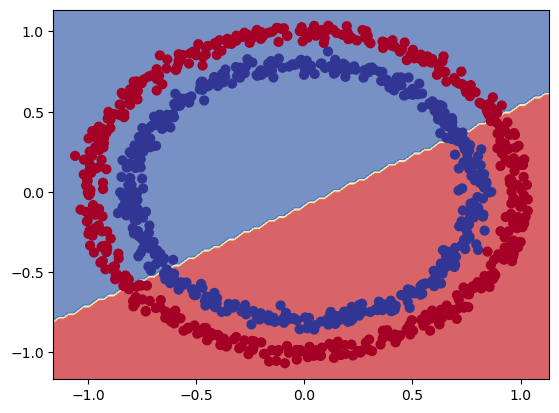

In [18]:
# check out the predictoins our model is making
plot_decision_boundary(model=model_3,
                        X=X,
                      y=y)

313/313 [==============================] - 1s 2ms/step
doing binary classification


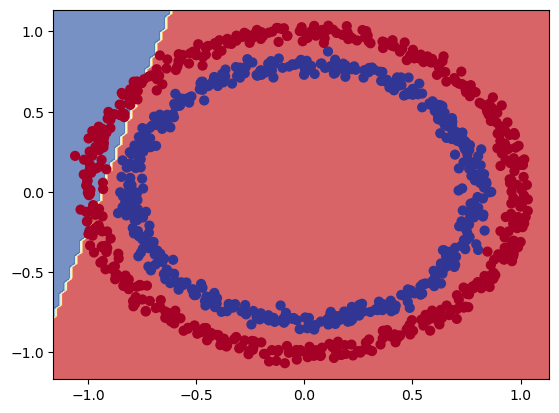

In [19]:
# check out the predictoins our model is making
plot_decision_boundary(model=model_2,
                        X=X,
                      y=y)

313/313 [==============================] - 0s 2ms/step
doing binary classification


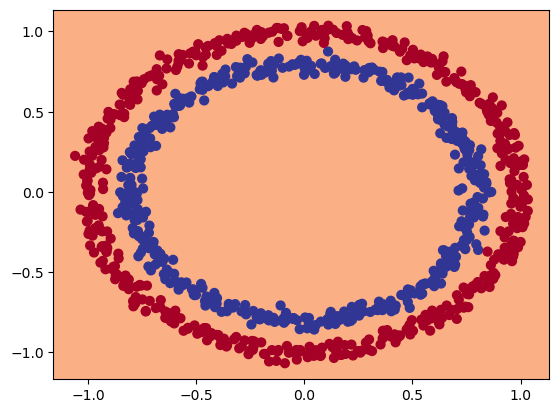

In [20]:
# check out the predictoins our model is making
plot_decision_boundary(model=model_1,
                        X=X,
                      y=y)

### The missing piece: Non-linearity

In [21]:
# Set the random seed
tf.random.set_seed(42)

# Create the model with sequential api
model_4 = tf.keras.Sequential([
#     tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics="accuracy")

# fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 6.1896 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 6.1715 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1663 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1646 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 6.1644 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1553 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1530 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1524 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1519 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1515 - accuracy: 0.4860
Epoch 11/

32/32 [==============================] - 0s 7ms/step - loss: 5.9665 - accuracy: 0.4870
Epoch 84/100
32/32 [==============================] - 0s 6ms/step - loss: 5.9659 - accuracy: 0.4870
Epoch 85/100
32/32 [==============================] - 0s 7ms/step - loss: 5.9652 - accuracy: 0.4870
Epoch 86/100
32/32 [==============================] - 0s 7ms/step - loss: 5.9645 - accuracy: 0.4870
Epoch 87/100
32/32 [==============================] - 0s 7ms/step - loss: 5.9452 - accuracy: 0.4850
Epoch 88/100
32/32 [==============================] - 0s 6ms/step - loss: 5.9302 - accuracy: 0.4850
Epoch 89/100
32/32 [==============================] - 0s 6ms/step - loss: 5.9198 - accuracy: 0.4840
Epoch 90/100
32/32 [==============================] - 0s 7ms/step - loss: 5.9082 - accuracy: 0.4840
Epoch 91/100
32/32 [==============================] - 0s 7ms/step - loss: 5.9060 - accuracy: 0.4840
Epoch 92/100
32/32 [==============================] - 0s 7ms/step - loss: 5.9045 - accuracy: 0.4840
Epoch 93/100


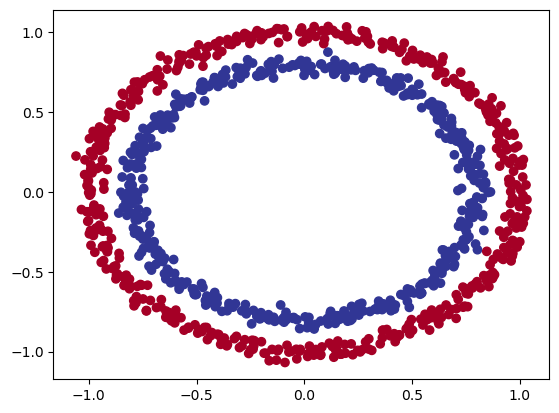

In [22]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


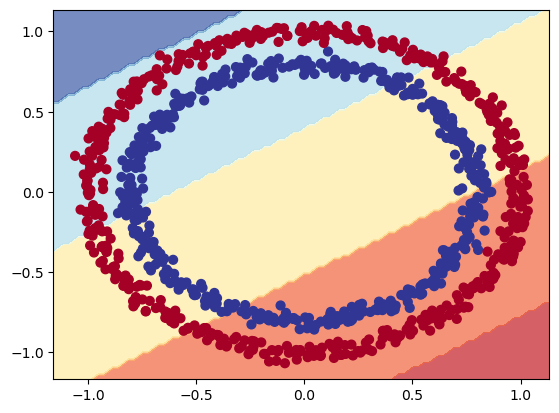

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

### Let's try build our first neural netwrok with a non-lnear function

In [24]:
# set random seed
tf.random.set_seed(42)

# create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
    
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.legacy.Adam(lr=0.001),
               metrics=['accuracy']
               )

# fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100


/Users/achbj/opt/miniconda3/envs/nn/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 9ms/step - loss: 4.9310 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 4.7386 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 4.5675 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 4.4961 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 4.4859 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 4.4700 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 4.4609 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 4.4452 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 4.4275 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 4.4204 - accuracy: 0.4740
Epoch 11/100
32/32 [=

In [25]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# set the random seed
tf.random.set_seed(42)

# create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# fit the model
history = model_6.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 10ms/step - loss: 4.4298 - accuracy: 0.4710
Epoch 2/10
32/32 [==============================] - 0s 8ms/step - loss: 4.2976 - accuracy: 0.4790
Epoch 3/10
32/32 [==============================] - 0s 8ms/step - loss: 4.1753 - accuracy: 0.4770
Epoch 4/10
32/32 [==============================] - 0s 8ms/step - loss: 4.0357 - accuracy: 0.4760
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 3.9229 - accuracy: 0.4730
Epoch 6/10
32/32 [==============================] - 0s 8ms/step - loss: 3.5368 - accuracy: 0.4750
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 3.1524 - accuracy: 0.4730
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 1.5846 - accuracy: 0.4630
Epoch 9/10
32/32 [==============================] - 0s 8ms/step - loss: 0.8122 - accuracy: 0.4420
Epoch 10/10
32/32 [==============================] - 0s 7ms/step - loss: 0.7946 - accuracy: 0.4360


In [26]:
# evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.7891 - accuracy: 0.4310


[0.7890626788139343, 0.4309999942779541]

313/313 [==============================] - 0s 1ms/step
doing binary classification


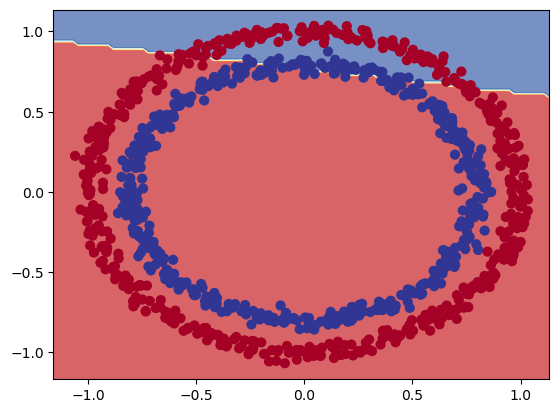

In [27]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

In [40]:
# set random seed
tf.random.set_seed(42)

# create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.legacy.Adam(),
               metrics=['accuracy'])

# fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6959 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.5070
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6946 - accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5080
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6942 - accuracy: 0.5150
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5140
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6942 - accuracy: 0.5160
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6947 - accuracy: 0.5100
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.5170
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.5110
Epoch 11

32/32 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.4880
Epoch 84/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5140
Epoch 85/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 86/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5040
Epoch 88/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.4780
Epoch 89/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.4870
Epoch 90/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6937 - accuracy: 0.4510
Epoch 91/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.4690
Epoch 92/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.5250
Epoch 93/100


In [41]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5890


[0.6932005882263184, 0.5889999866485596]

313/313 [==============================] - 0s 1ms/step
doing binary classification


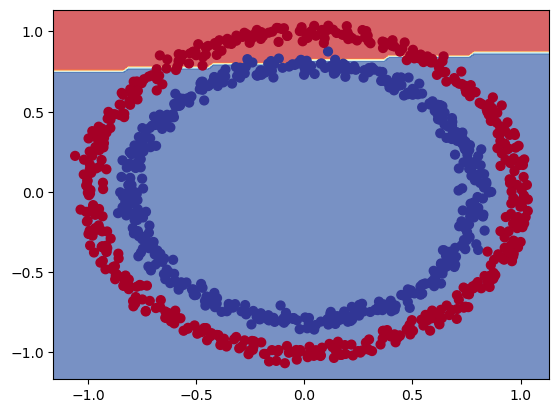

In [42]:
# visualize the data
plot_decision_boundary(model_7, X, y)

In [66]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics= "accuracy")
# 3. Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.7009 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6972 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6959 - accuracy: 0.5140
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6957 - accuracy: 0.5110
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6960 - accuracy: 0.5190
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6955 - accuracy: 0.5070
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6948 - accuracy: 0.5150
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.5220
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6947 - accuracy: 0.5140
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6944 - accuracy: 0.5060
Epoch 11

32/32 [==============================] - 0s 7ms/step - loss: 0.6961 - accuracy: 0.4680
Epoch 84/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5050
Epoch 85/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6955 - accuracy: 0.4970
Epoch 86/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6970 - accuracy: 0.4970
Epoch 87/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6945 - accuracy: 0.5200
Epoch 88/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6955 - accuracy: 0.4940
Epoch 89/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.4660
Epoch 90/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 91/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6942 - accuracy: 0.5020
Epoch 92/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.4960
Epoch 93/100


In [67]:
# Evaluate the model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.5040


[0.6967355608940125, 0.5040000081062317]

313/313 [==============================] - 0s 1ms/step
doing binary classification


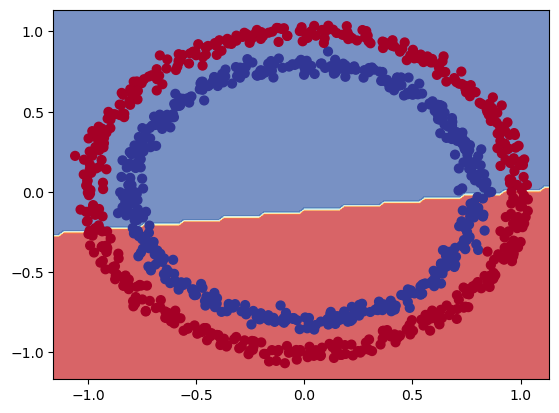

In [68]:
# visualize the data
plot_decision_boundary(model=model_8, X=X, y=y)

In [69]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [71]:
# create a toy tensor (smilar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

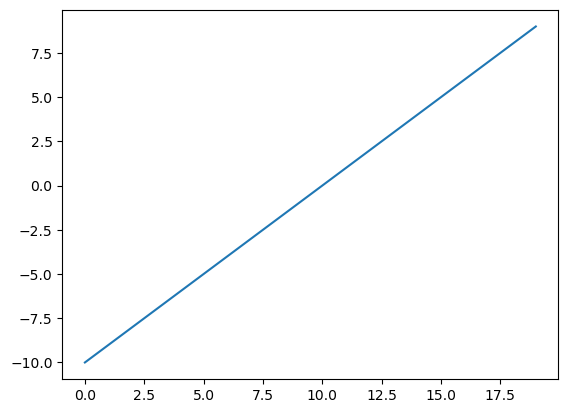

In [72]:
# visualize our toy tensor
plt.plot(A)

In [73]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [74]:
# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.53978682e-05, 1.23394580e-04, 3.35350138e-04, 9.11051175e-04,
       2.47262325e-03, 6.69285096e-03, 1.79862101e-02, 4.74258736e-02,
       1.19202934e-01, 2.68941432e-01, 5.00000000e-01, 7.31058598e-01,
       8.80797148e-01, 9.52574134e-01, 9.82013762e-01, 9.93307173e-01,
       9.97527421e-01, 9.99089003e-01, 9.99664664e-01, 9.99876618e-01],
      dtype=float32)>

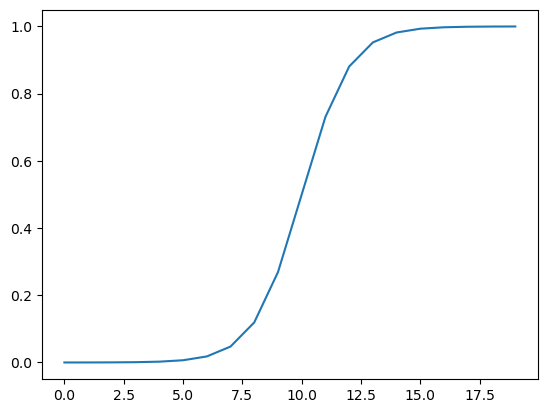

In [75]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))


In [76]:
# let's recreate the relu function

def relu(x):
    return tf.maximum(0, x)

In [77]:
# pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

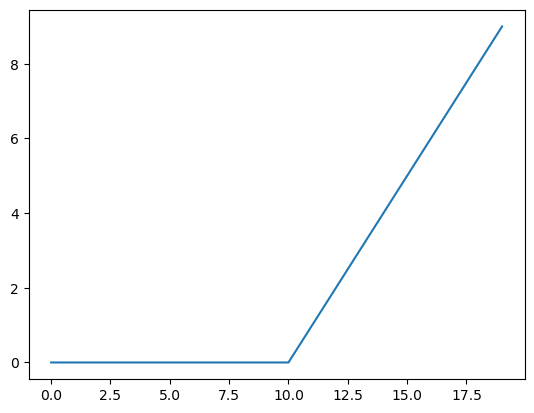

In [78]:
# plot our toy tensor transforme by relu
plt.plot(relu(A))

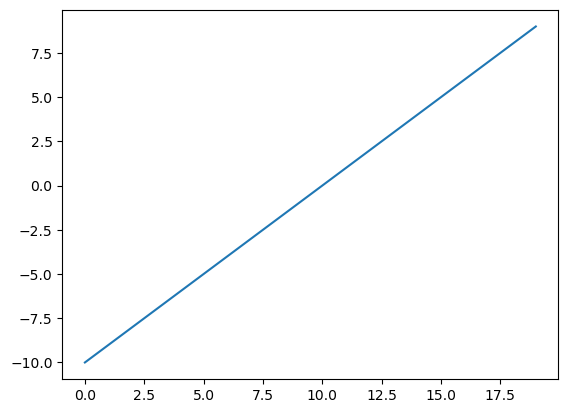

In [80]:
plt.plot(A)

In [81]:
# Let's try the linear activation function

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

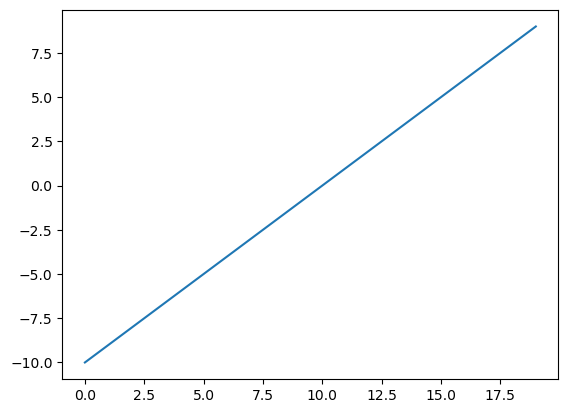

In [82]:
# Does the linear activatons functoin change anything
plt.plot(tf.keras.activations.linear(A))

In [83]:
# does A even change
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

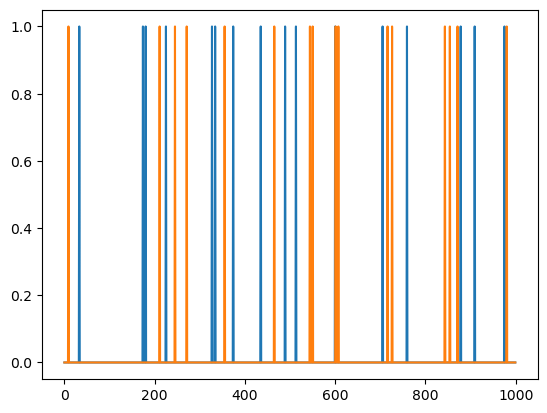

In [85]:
# what our data look like on relu function without parameter tuning
plt.plot(relu(X))

In [103]:
# let's load the model from colab 
colab_model = tf.keras.models.load_model('./model_7.h5')

313/313 [==============================] - 0s 1ms/step
doing binary classification


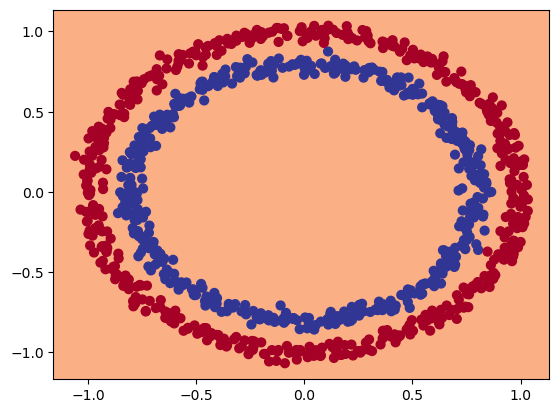

In [104]:
plot_decision_boundary(model=colab_model, X=X, y=y)

In [105]:
colab_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [106]:
model_7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 5)                 15        
                                                                 
 dense_24 (Dense)            (None, 5)                 30        
                                                                 
 dense_25 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [109]:
colab_model.load_weights('./model_7_weights.h5')

313/313 [==============================] - 0s 1ms/step
doing binary classification


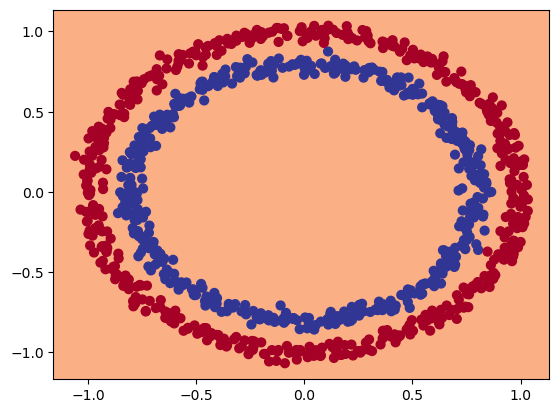

In [110]:
plot_decision_boundary(model_7, X, y)

### Evaluating and improving our classification 

In [112]:
# Chaeck how many examples we have
len(X)

1000

In [114]:
# train test spilit
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [119]:
#create model

# set random seed
tf.random.set_seed(42)

# create model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit the model
history = model_9.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 1s 13ms/step - loss: 0.6973 - accuracy: 0.4594 - val_loss: 0.6963 - val_accuracy: 0.4187
Epoch 2/200
20/20 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6979 - val_accuracy: 0.4187
Epoch 3/200
20/20 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.5031 - val_loss: 0.6990 - val_accuracy: 0.4437
Epoch 4/200
20/20 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.4766 - val_loss: 0.7000 - val_accuracy: 0.4375
Epoch 5/200
20/20 [==============================] - 0s 8ms/step - loss: 0.6924 - accuracy: 0.4672 - val_loss: 0.7018 - val_accuracy: 0.4250
Epoch 6/200
20/20 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.4625 - val_loss: 0.7001 - val_accuracy: 0.4250
Epoch 7/200
20/20 [==============================] - 0s 8ms/step - loss: 0.6921 - accuracy: 0.4828 - val_loss: 0.7020 - val_accuracy: 0.4000
Epoch 8/200


Epoch 59/200
20/20 [==============================] - 0s 7ms/step - loss: 0.7017 - accuracy: 0.4984 - val_loss: 0.6970 - val_accuracy: 0.4875
Epoch 60/200
20/20 [==============================] - 0s 8ms/step - loss: 0.7134 - accuracy: 0.4891 - val_loss: 0.7047 - val_accuracy: 0.5063
Epoch 61/200
20/20 [==============================] - 0s 8ms/step - loss: 0.6961 - accuracy: 0.5266 - val_loss: 0.7178 - val_accuracy: 0.4938
Epoch 62/200
20/20 [==============================] - 0s 7ms/step - loss: 0.7027 - accuracy: 0.4906 - val_loss: 0.7034 - val_accuracy: 0.4812
Epoch 63/200
20/20 [==============================] - 0s 7ms/step - loss: 0.6953 - accuracy: 0.5109 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 64/200
20/20 [==============================] - 0s 7ms/step - loss: 0.7006 - accuracy: 0.4625 - val_loss: 0.6946 - val_accuracy: 0.4812
Epoch 65/200
20/20 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.4922 - val_loss: 0.6983 - val_accuracy: 0.4875
Epoch 

20/20 [==============================] - 0s 8ms/step - loss: 0.6900 - accuracy: 0.5266 - val_loss: 0.7465 - val_accuracy: 0.4938
Epoch 117/200
20/20 [==============================] - 0s 7ms/step - loss: 0.7393 - accuracy: 0.4781 - val_loss: 0.6905 - val_accuracy: 0.5375
Epoch 118/200
20/20 [==============================] - 0s 9ms/step - loss: 0.7405 - accuracy: 0.5063 - val_loss: 0.7010 - val_accuracy: 0.5000
Epoch 119/200
20/20 [==============================] - 0s 8ms/step - loss: 0.7170 - accuracy: 0.5031 - val_loss: 0.7078 - val_accuracy: 0.4688
Epoch 120/200
20/20 [==============================] - 0s 9ms/step - loss: 0.6968 - accuracy: 0.5094 - val_loss: 0.6946 - val_accuracy: 0.5312
Epoch 121/200
20/20 [==============================] - 0s 8ms/step - loss: 0.7109 - accuracy: 0.4859 - val_loss: 0.7107 - val_accuracy: 0.4750
Epoch 122/200
20/20 [==============================] - 0s 8ms/step - loss: 0.7010 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.5437
Epoch 123/200

20/20 [==============================] - 0s 7ms/step - loss: 0.7541 - accuracy: 0.4641 - val_loss: 0.7274 - val_accuracy: 0.5000
Epoch 174/200
20/20 [==============================] - 0s 7ms/step - loss: 0.7224 - accuracy: 0.5266 - val_loss: 0.8450 - val_accuracy: 0.5000
Epoch 175/200
20/20 [==============================] - 0s 7ms/step - loss: 0.8005 - accuracy: 0.5094 - val_loss: 0.7968 - val_accuracy: 0.4750
Epoch 176/200
20/20 [==============================] - 0s 7ms/step - loss: 0.7292 - accuracy: 0.5063 - val_loss: 0.7167 - val_accuracy: 0.5063
Epoch 177/200
20/20 [==============================] - 0s 7ms/step - loss: 0.7129 - accuracy: 0.5266 - val_loss: 0.7131 - val_accuracy: 0.5063
Epoch 178/200
20/20 [==============================] - 0s 7ms/step - loss: 0.7413 - accuracy: 0.5156 - val_loss: 0.7407 - val_accuracy: 0.4938
Epoch 179/200
20/20 [==============================] - 0s 7ms/step - loss: 0.7278 - accuracy: 0.4922 - val_loss: 0.7175 - val_accuracy: 0.5063
Epoch 180/200

In [121]:
# Evaluate the model
test_loss, test_accuracy = model_9.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 0s 15ms/step - loss: 0.8487 - accuracy: 0.5550
Test Loss: 0.848676323890686
Test Accuracy: 0.5550000071525574


In [123]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# Define callbacks for early stopping and model checkpointing
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
]

# Fit the model with validation split and callbacks
history = model_10.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=callbacks)


Epoch 1/200
20/20 [==============================] - 1s 16ms/step - loss: 0.6932 - accuracy: 0.4891 - val_loss: 0.7065 - val_accuracy: 0.4688
Epoch 2/200
20/20 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5047 - val_loss: 0.7069 - val_accuracy: 0.4625
Epoch 3/200
20/20 [==============================] - 0s 9ms/step - loss: 0.6925 - accuracy: 0.4969 - val_loss: 0.7060 - val_accuracy: 0.4750
Epoch 4/200
20/20 [==============================] - 0s 10ms/step - loss: 0.6926 - accuracy: 0.5078 - val_loss: 0.7050 - val_accuracy: 0.4500
Epoch 5/200
20/20 [==============================] - 0s 9ms/step - loss: 0.6939 - accuracy: 0.5031 - val_loss: 0.7040 - val_accuracy: 0.4437
Epoch 6/200
20/20 [==============================] - 0s 9ms/step - loss: 0.6939 - accuracy: 0.4797 - val_loss: 0.7018 - val_accuracy: 0.4625
Epoch 7/200
20/20 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.4953 - val_loss: 0.7067 - val_accuracy: 0.4625
Epoch 8/200

In [125]:
# Load the best saved model
model_10.load_weights("best_model.h5")

# Evaluate the model
test_loss, test_accuracy = model_10.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 0s 26ms/step - loss: 0.6944 - accuracy: 0.4750
Test Loss: 0.694426417350769
Test Accuracy: 0.4749999940395355


In [126]:
# set random seed tf.random_set
tf.random.set_seed(42)

# create a model(same as model_9)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_11.compile(loss="binary_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

# Creating a learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/20))

# fit the model
history_11 = model_9.fit(X_train, y_train, epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 9ms/step - loss: 0.7654 - accuracy: 0.5312 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7145 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7062 - accuracy: 0.4762 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7030 - accuracy: 0.5188 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7056 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7050 - accuracy: 0.5250 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7034 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7070 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss:

25/25 [==============================] - 0s 6ms/step - loss: 393.8241 - accuracy: 0.4963 - lr: 0.3548
Epoch 73/100
25/25 [==============================] - 0s 6ms/step - loss: 642.6520 - accuracy: 0.5063 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 6ms/step - loss: 893.9032 - accuracy: 0.5263 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 6ms/step - loss: 883.9238 - accuracy: 0.4837 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 6ms/step - loss: 666.0167 - accuracy: 0.5088 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 6ms/step - loss: 1127.7606 - accuracy: 0.4837 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 6ms/step - loss: 1067.5474 - accuracy: 0.4950 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 6ms/step - loss: 1121.2681 - accuracy: 0.5025 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 6ms/step - loss: 829.8222 - accur

<Axes: >

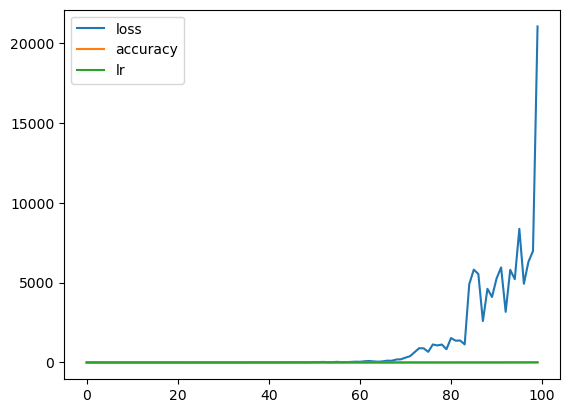

In [127]:
# Checkout the history
pd.DataFrame(history_11.history).plot()